In [1]:
from fastai.vision import *

### Create training/validation datasets

In [11]:
CLASSES = [
    'double_bass',
    'cello',
    'viola',
    'violin'
]

strings_path = Path('../data/strings')
image_urls_path = Path('../data/image_urls')

In [16]:
for folder in CLASSES:
    dest = strings_path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [17]:
strings_path.ls()

[PosixPath('../data/strings/cello'),
 PosixPath('../data/strings/viola'),
 PosixPath('../data/strings/violin'),
 PosixPath('../data/strings/double_bass')]

In [18]:
# download images from downloaded csv files from Google images.
for c in CLASSES:
    dest = strings_path/c
    file = f'{image_urls_path}/urls_{c}.csv'
    download_images(urls=file, dest=dest, max_pics=500)

Error https://www.washingtonpost.com/resizer/ZQLDZy8zy7m0D2VbWPM6p0ksJtg=/960x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/WH4WJ5OJTE7XDDX7WCPQ4NT22M.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [20]:
# remove broken images and resize to max_size
for c in CLASSES:
    print(c)
    verify_images(path=strings_path/c, delete=True, max_size=500)

double_bass


cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000094.jpg'>
Image ../data/strings/double_bass/00000044.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000089.png'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000022.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000046.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/double_bass/00000073.jpg'>
Image ../data/strings/double_bass/00000023.png has 4 instead of 3 channels
Image ../data/strings/double_bass/00000020.jpg has 1 instead of 3 channels
cello


/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='../data/strings/cello/00000031.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/cello/00000057.jpg'>
Image ../data/strings/cello/00000052.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/cello/00000075.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/cello/00000022.jpg'>
Image ../data/strings/cello/00000050.png has 4 instead of 3 channels
Image ../data/strings/cello/00000046.jpg has 4 instead of 3 channels
viola


Image ../data/strings/viola/00000099.png has 4 instead of 3 channels


/opt/conda/envs/fastai/lib/python3.6/site-packages/PIL/Image.py:969: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000188.jpg'>
Image ../data/strings/viola/00000044.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000027.jpg'>
Image ../data/strings/viola/00000132.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000013.jpg'>
Image ../data/strings/viola/00000105.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000126.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/viola/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='../data/strings/viol

Image ../data/strings/violin/00000020.png has 4 instead of 3 channels
Image ../data/strings/violin/00000038.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='../data/strings/violin/00000016.jpg'>
Image ../data/strings/violin/00000049.gif has 1 instead of 3 channels


In [100]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path=strings_path,
                                  train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [67]:
doc(ImageDataBunch.from_folder)

In [68]:
data.classes

['cello', 'double_bass', 'viola', 'violin']

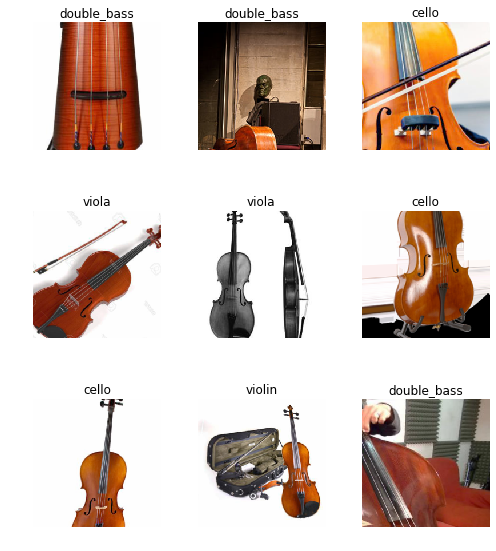

In [69]:
data.show_batch(rows=3, figsize=(7, 8))

### Dataset Observations
There's definitely some clean up to do to remove any images that doesn't have the actual instrument. However, even with some noise in the datasets, the classifier may still be able to distinguish accurately.

### Possible improvements to the dataset
#### Remove irrelevant images
The datasets include images that do not show the actual instrument. For better performance, we would want to filter these out.

#### Remove multiple class images
We see some images with a violin and viola. Since this model's task is a binary classification, we would want to filter out images with multiple classes to reduce confusion.

#### Remove partial class images
The datasets include images that only show part of the instrument. This can be a problem because some parts of the instrument can look very similar. For example, figuring out the difference between a violin and viola will be a difficult challenge even for a person when only looking at the pegs and fingerboard. 

#### Add more images of people playing the instrument
Even with the whole instrument in the image, finding the difference between a violin and a viola is a challenge. One significant signal would be to include images where a person is playing the instrument. One can tell the difference between a violin and viola by looking at the size proportion to the person. One we include images of people playing the cello and the double bass, we can easily figure out the difference.

In [101]:
print(f'Classes: {data.classes}')
print(f'Number of classes: {data.c}')
print(f'Training dataset size: {len(data.train_ds)}')
print(f'Validation dataset size: {len(data.valid_ds)}')

Classes: ['cello', 'double_bass', 'viola', 'violin']
Number of classes: 4
Training dataset size: 366
Validation dataset size: 91


### Train a model

In [70]:
model = create_cnn(data, models.resnet34, metrics=error_rate)

In [71]:
# Fine-tune model for 4 epochs
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.754034,1.360833,0.670330
2,1.547691,1.199065,0.516484
3,1.346820,1.191842,0.461538
4,1.223083,1.227493,0.439560


In [72]:
# Let's fine-tune 4 more epochs
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.908116,1.242761,0.494505
2,0.854696,1.272017,0.494505
3,0.784234,1.240434,0.472527
4,0.741856,1.233984,0.472527


In [34]:
model.save('stage-1')

In [35]:
# Previously, we were only fine-tuning the last linear layers.
# Let's fine-tune the rest of the model layers
model.unfreeze()

In [36]:
# Let's find an appropriate learning rate
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


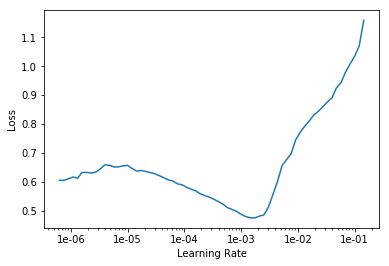

In [37]:
model.recorder.plot()

In [38]:
model.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.686176,1.303672,0.472527
2,0.615582,1.307927,0.472527


In [40]:
model.save('stage-2')

### Evaluate the model

In [42]:
interpreter = ClassificationInterpretation.from_learner(model)

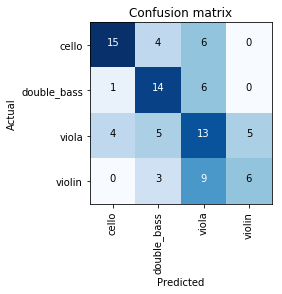

In [43]:
interpreter.plot_confusion_matrix()

#### Evaluation Notes
As predicted, the model is having a hard time figuring out the differences between a violin or viola especially. Let's clean up the images first and see how it does on the cleaned dataset.

### Clean datasets

In [44]:
from fastai.widgets import *

In [45]:
ds, idxs = DatasetFormatter().from_toplosses(model, 
                                             ds_type=DatasetType.Valid)

In [47]:
ImageCleaner(ds, idxs, strings_path)

'No images to show :)'

In [49]:
ds, idxs = DatasetFormatter().from_similars(model, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [50]:
ImageCleaner(ds, idxs, strings_path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

### Train again with cleaned datasets

In [103]:
## use cleaned image instead
data = ImageDataBunch.from_csv(path=strings_path,
                               folder=".", valid_pct=0.2,
                               csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(),
                               size=224,
                               num_workers=4).normalize(imagenet_stats)

In [104]:
print(f'Classes: {data.classes}')
print(f'Number of classes: {data.c}')
print(f'Training dataset size: {len(data.train_ds)}')
print(f'Validation dataset size: {len(data.valid_ds)}')

Classes: ['cello', 'double_bass', 'viola', 'violin']
Number of classes: 4
Training dataset size: 273
Validation dataset size: 68


In [91]:
model_clean = create_cnn(data, models.resnet34, metrics=error_rate)

In [92]:
model_clean.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate
1,1.823992,1.591964,0.705882
2,1.714963,1.451081,0.647059
3,1.534707,1.333598,0.558824
4,1.353155,1.206911,0.514706
5,1.227289,1.173284,0.514706
6,1.129238,1.135012,0.514706
7,1.057852,1.110571,0.500000
8,0.978640,1.105306,0.470588
9,0.919528,1.107792,0.485294


In [93]:
model_clean.save('stage-1-clean')

In [94]:
model_clean.unfreeze()
model_clean.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


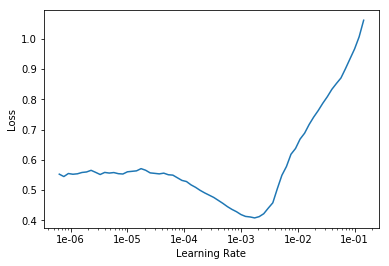

In [95]:
model_clean.recorder.plot()

In [96]:
model_clean.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.582779,1.106583,0.514706
2,0.587474,1.104914,0.485294


In [97]:
model_clean.save('stage-2-clean')

### Let's check our second model's results

In [98]:
interpreter_clean = ClassificationInterpretation.from_learner(model_clean)

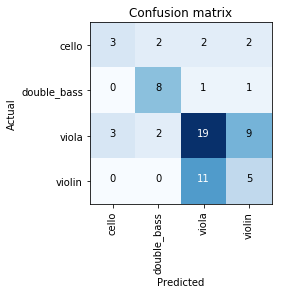

In [99]:
interpreter_clean.plot_confusion_matrix()

### Future Work
Looking at just the confusion matrix, it's hard to tell if we made some improvements after cleaning the datasets. If we calculate how many true positives there are for each class, we can see improvements in some class and regression in others.

#### Improvements 
##### Double Bass
* First model - 66.6%
* Second model - 80%

##### Viola
* First model - 48%
* Second model - 58%

#### Regression
##### Cello
* First model - 60% (TP/TP+FN)
* Second model - 33%

##### Violin
* First model - 33.3%
* Second model - 31%

#### Improvements to make
* Make sure the dataset is balanced, and includes enough examples.
* It depends how what photos users will use as an input, but if we recieve more photos of people playing the instrument, we can possibly classify these images better than just the instruments alone in the photo. We'll want to add more photos of people playing the instruments.